### Importing needed packages

In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

### Setting up parameters

In [3]:
#input parameters
S_0 = 100                                   #asset price at t=0
K = 99                                      #Strike price
optionType = "CALL"                         #Call or put option; "CALL" for call option, "PUT" for put option
optionKind = "EUR"                          #American or European option; "EUR" or "US"
r = .06                                     #yearly interest rate
T = 1                                       #total period in years
steps = 50                                  #amount of steps                            #step duration
vol = 0.2                                   #volatility


### Script to calculate European/American call/put option prices

In [5]:
#calculating step-by-step option value
def calculateOptionValue (fu, fd, u, d, dt):
    p = (math.exp(r*dt) - d) / (u - d)
    fvalue = (p*fu + (1-p)*fd) * math.exp(-r*dt)
    return fvalue

#main function
def optionValuation (S_0, K, steps, optionKind, optionType, vol):
    dt = T / steps  
    #calculating volatility
    u = math.exp(vol * math.sqrt(dt))           #upward volatility
    d = math.exp(-(vol * math.sqrt(dt)))        #downward volatility

    #generate table with all associated asset prices
    table = []
    for i in range(0, steps+1):
        table.append([])
        for j in range(0, i+1):
            table[i].append(S_0 * (u ** (i-j)) * (d ** j) )
    table.reverse()

    #generate table with all associated option prices
    table_prices = []
    for i in range(len(table)):
        table_prices.append([])
        if i == 0:
            for j in range(len(table[i])):
                if optionType == "CALL":
                    table_prices[i].append(max(table[i][j]-K,0))
                elif optionType == "PUT":
                    table_prices[i].append(max(K-table[i][j],0))
        else:
            for j in range(len(table[i])):
                if optionKind == "EUR":
                    table_prices[i].append(calculateOptionValue (table_prices[i-1][j], table_prices[i-1][j+1], u, d, dt))
                elif optionKind == "US":
                    if optionType == "CALL":
                        optionValue = calculateOptionValue (table_prices[i-1][j], table_prices[i-1][j+1], u, d, dt)
                        payOff = table[i][j] - K
                        if payOff > optionValue:
                            table_prices[i].append(payOff)
                        else:
                            table_prices[i].append(optionValue)
                    elif optionType == "PUT":
                        optionValue = calculateOptionValue (table_prices[i-1][j], table_prices[i-1][j+1], u, d, dt)
                        payOff =  K - table[i][j]
                        if payOff > optionValue:
                            table_prices[i].append(payOff)
                        else:
                            table_prices[i].append(optionValue)
                        
    return table_prices[-1][0]

optionValuation(S_0, K, steps, optionKind, optionType, 0.01)

6.76531117515916

In [6]:
#Black and Scholes
def d1(S_0, K, r, sigma, T):
    return (np.log(S_0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
 
def d2(S_0, K, r, sigma, T):
    return (np.log(S_0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
 
def blackScholes(optionType,S_0, K, r, sigma, T):
    if optionType=="CALL":
        return S_0 * ss.norm.cdf(d1(S_0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S_0, K, r, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S_0, K, r, sigma, T)) - S_0 * ss.norm.cdf(-d1(S_0, K, r, sigma, T))

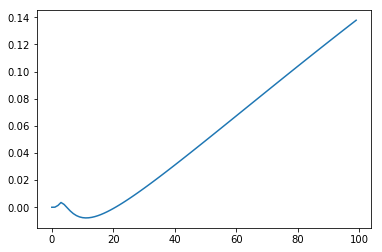

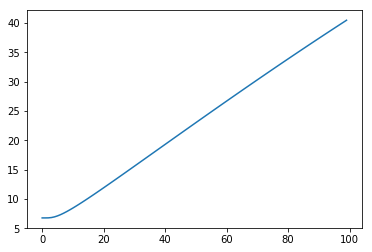

In [7]:
def onepointone(start,end,step):
    vary_vol = []
    ana_sols = []
    for sigma in np.linspace(start,end,step):
        ana_sol = blackScholes(optionType,S_0, K, r, sigma, T)
        num_sol = optionValuation(S_0, K, steps, optionKind, optionType, sigma)
        vary_vol.append(ana_sol - num_sol)
        ana_sols.append(ana_sol)
    plt.plot(vary_vol)
    plt.show()
    plt.plot(ana_sols)


    
    
onepointone(0.01,1,100)


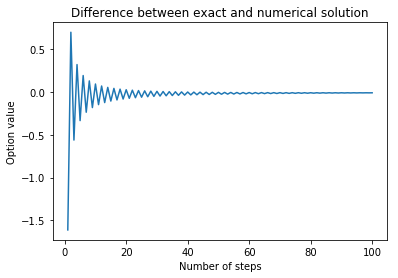

In [13]:
def onepointtwo(start, end, step):
    vary_dt = []
    for steps in np.linspace(start, end, step):
        ana_sol = blackScholes(optionType,S_0, K, r, vol, T)
        num_sol = optionValuation(S_0, K, int(steps), optionKind, optionType, vol)
        vary_dt.append(ana_sol - num_sol)
    plt.xlabel("Number of steps")
    plt.ylabel("Option value")
    plt.title("Difference between exact and numerical solution")
    plt.plot(np.linspace(start, end, step), vary_dt)
    
    
onepointtwo(1, 100, 100)
        
    

In [ ]:
def hedge_binom(S_0, k, vol):
    u = math.exp(vol * math.sqrt(dt))           #upward volatility
    d = math.exp(-(vol * math.sqrt(dt)))        #downward volatility
    return((up-k) / (up-down))

    